In this project I have given two csv files of titanic dataset train and test csv files. In this project I have implemented my own logistic regression function and used them to predict for the test data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data = pd.read_csv("train.csv")

In [3]:
print('The number of samples in the train data is ',data.shape[0])

The number of samples in the train data is  668


In [4]:
print('The number of features in the train data is ',data.shape[1])

The number of features in the train data is  11


In [5]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


clearly the feature such as Name and Ticket has no use in predicting the output so we will drop such features and instead of 
sex features we will create a feature as male containing values 0 and 1 if the value in it is 1 then passenger is male otherwise
female.

In [6]:
data.drop(["Name","Ticket"],axis=1,inplace=True)
def male_ohe(g):
    if g == "male":
        return 1
    else:
        return 0


data["Male"] = data["Sex"].apply(male_ohe)
data.drop("Sex",axis=1,inplace=True)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Male
0,2,29.0,1,0,26.000,NaN,S,1,0
1,3,NaN,0,0,8.050,NaN,S,0,1
2,2,39.0,0,0,26.000,NaN,S,0,1
3,3,29.0,0,4,21.075,NaN,S,0,0
4,3,25.0,0,0,7.050,NaN,S,0,1


In place of Embarked features we are creating three different features as Cheerbourg, Queenstown and Southamptom having values 
0 or 1 depending upon where the passenger embarked and dropping the feature Embarked

In [7]:
def cherbourg(s):
    if s=="C":
        return 1
    else:
        return 0
    
def queenstown(s):
    if s=="Q":
        return 1
    else:
        return 0

def southamptom(s):
    if s=="S":
        return 1
    else:
        return 0
data["Cherbourg"] = data.Embarked.apply(cherbourg)
data["Queenstown"] = data.Embarked.apply(queenstown)
data["Southamptom"] = data.Embarked.apply(southamptom)
data.drop("Embarked",axis=1, inplace=True)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Cherbourg,Queenstown,Southamptom
0,2,29.0,1,0,26.000,NaN,1,0,0,0,1
1,3,NaN,0,0,8.050,NaN,0,1,0,0,1
2,2,39.0,0,0,26.000,NaN,0,1,0,0,1
3,3,29.0,0,4,21.075,NaN,0,0,0,0,1
4,3,25.0,0,0,7.050,NaN,0,1,0,0,1


passengers who have there cabin we are assigning them 1 values whereas passenger who don't have any cabins we assign them 0 values

In [8]:
def cabin(x):
    if x is np.nan:
        return 0
    else:
        return 1
data["Cabin"] = data.Cabin.apply(cabin)
data

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Cherbourg,Queenstown,Southamptom
0,2,29.0,1,0,26.0000,0,1,0,0,0,1
1,3,NaN,0,0,8.0500,0,0,1,0,0,1
2,2,39.0,0,0,26.0000,0,0,1,0,0,1
3,3,29.0,0,4,21.0750,0,0,0,0,0,1
4,3,25.0,0,0,7.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
663,2,17.0,0,0,10.5000,0,1,0,0,0,1
664,3,NaN,0,0,7.7500,0,0,1,0,1,0
665,3,32.0,0,0,56.4958,0,1,1,0,0,1
666,3,22.0,0,0,9.8375,0,0,0,0,0,1


In [9]:
# check missing values in train data
data.isnull().sum()

Pclass           0
Age            132
SibSp            0
Parch            0
Fare             0
Cabin            0
Survived         0
Male             0
Cherbourg        0
Queenstown       0
Southamptom      0
dtype: int64

In [10]:
print('Percent of missing "Age" records is ',(data['Age'].isnull().sum()/data.shape[0])*100,'%')

Percent of missing "Age" records is  19.760479041916167 %


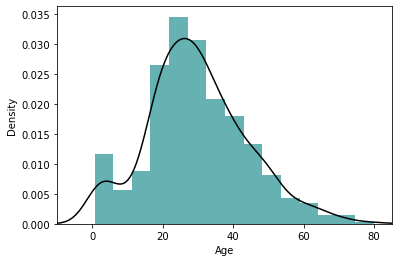

In [11]:
ax = data["Age"].hist(bins=15, density=True, color='teal',alpha=0.6)
data["Age"].plot(kind='density', color='black')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [12]:
# mean age
print('The mean of "Age" is %.2f' %(data["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(data["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 29.00


Filling the empty values of Age with the median

In [13]:
data["Age"].fillna(data["Age"].median(),inplace=True)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Cherbourg,Queenstown,Southamptom
0,2,29.0,1,0,26.000,0,1,0,0,0,1
1,3,29.0,0,0,8.050,0,0,1,0,0,1
2,2,39.0,0,0,26.000,0,0,1,0,0,1
3,3,29.0,0,4,21.075,0,0,0,0,0,1
4,3,25.0,0,0,7.050,0,0,1,0,0,1


In [14]:
data.isnull().sum()

Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Survived       0
Male           0
Cherbourg      0
Queenstown     0
Southamptom    0
dtype: int64

clearly our testing data don't have any null values so now the cleaning part is almost done. The only thing is left to do is to split our data into X and Y for which we have to change the order of columns i.e. we will place the output column or survived column in the last of our data so that it become easy to split it into X and Y

In [15]:
data = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Cabin','Male','Cherbourg','Queenstown','Southamptom','Survived']]
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Cherbourg,Queenstown,Southamptom,Survived
0,2,29.0,1,0,26.000,0,0,0,0,1,1
1,3,29.0,0,0,8.050,0,1,0,0,1,0
2,2,39.0,0,0,26.000,0,1,0,0,1,0
3,3,29.0,0,4,21.075,0,0,0,0,1,0
4,3,25.0,0,0,7.050,0,1,0,0,1,0


In [16]:
data = data.values

In [17]:
X = data[:,0:10]
Y = data[:,10]
X.shape,Y.shape

((668, 10), (668,))

Now let's normalise our data with the help of standarscaler present in sklearn and then add an extra column containing all its values as 1 for the bias term so that we don't have to particularly add the bias term

In [18]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
#StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.transform(X)

X_scaled = np.append(X_scaled,np.ones(X_scaled.shape[0]).reshape(-1,1),axis=1)
X_scaled.shape,X_scaled[0].shape

((668, 11), (11,))

code for sigmoid,cost,step_gradient, fit, predict and accuracy function

In [19]:
def sigmoid(agg):
    
    return 1/(1+np.exp(-agg))

def cost(X_train,Y_train,m):
    
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        cost = -Y_train[i]*np.log(h) - (1-Y_train[i])*np.log(1-h)
        cost_ += cost
    
    return cost_

def step_gradient(X_train,Y_train,lr,m):
    
    N = X_train.shape[0]
    slope_m = np.zeros(X_train.shape[1])
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        slope_m+=(-1/N)*(Y_train[i]-h)*X_train[i]
        
    m = m - lr*slope_m
    return m

def fit(X_train,Y_train,epochs=100,lr=0.01):
    
    m = np.zeros(X_train.shape[1])
    cost_array = []
    unit = epochs//10
    for i in range(epochs+1):
        m = step_gradient(X_train,Y_train,lr,m)
        cost_ = cost(X_train,Y_train,m)
        cost_array.append(cost_)
        if i%unit==0:
            print("Epoch:{}, Cost:{}".format(i,cost_))
    
    return m

def predict(X_test,m):
    
    y_pred = []
    N = X_test.shape[0]
    for i in range(N):
        agg = (X_test[i]*m).sum()
        h = sigmoid(agg)
        if h>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return np.array(y_pred)

def accuracy(Y_test,Y_pred):
    
    correct = 0
    N = Y_test.shape[0]
    correct = (Y_test==Y_pred).sum()
    
    return (correct/N)*100


calculating the weight value(m) by taking learning rate = 0.01 and number of iterations = 3000

In [22]:
m = fit(X_scaled,Y,3000,0.01)
print(m)

Epoch:0, Cost:461.9785152415146
Epoch:300, Cost:344.68602291084113
Epoch:600, Cost:320.3704338599514
Epoch:900, Cost:311.1247536890323
Epoch:1200, Cost:306.8650989405156
Epoch:1500, Cost:304.6849806384847
Epoch:1800, Cost:303.48507732172305
Epoch:2100, Cost:302.78709777932795
Epoch:2400, Cost:302.3625973646785
Epoch:2700, Cost:302.09464309416165
Epoch:3000, Cost:301.92004150378193
[-0.63163319 -0.46119068 -0.30311597 -0.13232035  0.04935671  0.31708345
 -1.24619908  0.05857612  0.03220019 -0.0833964  -0.48768246]


calculating the weight value(m1) by taking learning rate = 0.02 and number of iterations = 3000

In [23]:
m1 = fit(X_scaled,Y,3000,0.02)
print(m1)

Epoch:0, Cost:460.9398657638049
Epoch:300, Cost:320.2973685732067
Epoch:600, Cost:306.84647698576305
Epoch:900, Cost:303.47876190320545
Epoch:1200, Cost:302.3600985099079
Epoch:1500, Cost:301.91893906409507
Epoch:1800, Cost:301.7223334015915
Epoch:2100, Cost:301.62631589720996
Epoch:2400, Cost:301.57611991795545
Epoch:2700, Cost:301.54855392237596
Epoch:3000, Cost:301.5328807480363
[-0.71793779 -0.50644151 -0.33087474 -0.13411129  0.01710951  0.29223835
 -1.28818604  0.05259863  0.03607189 -0.08590096 -0.5054955 ]


calculating the weight value(m2) by taking learning rate = 0.05 and number of iterations = 3000

In [25]:
m2 = fit(X_scaled,Y,3000,0.05)
print(m2)

Epoch:0, Cost:457.85482469126515
Epoch:300, Cost:304.64281525202193
Epoch:600, Cost:301.9156501707306
Epoch:900, Cost:301.59676304777395
Epoch:1200, Cost:301.5327288522672
Epoch:1500, Cost:301.5164666436549
Epoch:1800, Cost:301.5118889167088
Epoch:2100, Cost:301.5104864040435
Epoch:2400, Cost:301.5099807379228
Epoch:2700, Cost:301.50973228494655
Epoch:3000, Cost:301.509558351797
[-0.74924858 -0.515202   -0.3332485  -0.13020517  0.00656554  0.27588519
 -1.29277024  0.04500613  0.03520426 -0.09454061 -0.50954828]


calculating the weight value(m3) by taking learning rate = 0.1 and number of iterations = 3000

In [26]:
m3 = fit(X_scaled,Y,3000,0.1)
print(m3)

Epoch:0, Cost:452.81606004678605
Epoch:300, Cost:301.9102297021997
Epoch:600, Cost:301.53247786455705
Epoch:900, Cost:301.51186568539123
Epoch:1200, Cost:301.5099778916595
Epoch:1500, Cost:301.50955751065715
Epoch:1800, Cost:301.5092607224191
Epoch:2100, Cost:301.50897686954863
Epoch:2400, Cost:301.5086967345738
Epoch:2700, Cost:301.50841951274913
Epoch:3000, Cost:301.5081450985474
[-0.74998534 -0.51533031 -0.33319557 -0.13009433  0.00632221  0.27540618
 -1.29278087  0.03416512  0.02815726 -0.10668843 -0.50959771]


calculating the weight value(m4) by taking learning rate = 0.2 and number of iterations = 3000

In [27]:
m4 = fit(X_scaled,Y,3000,0.2)
print(m4)

Epoch:0, Cost:443.12383991804245
Epoch:300, Cost:301.53198395841594
Epoch:600, Cost:301.50997228268017
Epoch:900, Cost:301.50925943677373
Epoch:1200, Cost:301.5086955088411
Epoch:1500, Cost:301.5081438931765
Epoch:1800, Cost:301.50760332594746
Epoch:2100, Cost:301.5070734786687
Epoch:2400, Cost:301.5065540413834
Epoch:2700, Cost:301.50604471584154
Epoch:3000, Cost:301.50554521492217
[-0.74996653 -0.51532519 -0.33317413 -0.13007254  0.00631075  0.27536786
 -1.29272646  0.0133143   0.01440683 -0.13001373 -0.50954094]


calculating the weight value(m5) by taking learning rate = 0.3 and number of iterations = 3000

In [28]:
m5 = fit(X_scaled,Y,3000,0.3)
print(m5)

Epoch:0, Cost:433.94268959191953
Epoch:300, Cost:301.51177523581975
Epoch:600, Cost:301.5092581481828
Epoch:900, Cost:301.50841707781666
Epoch:1200, Cost:301.5076021359958
Epoch:1500, Cost:301.5068113162515
Epoch:1800, Cost:301.506043581897
Epoch:2100, Cost:301.505297954449
Epoch:2400, Cost:301.5045735092043
Epoch:2700, Cost:301.5038693716411
Epoch:3000, Cost:301.50318471409287
[-0.74994807 -0.51532031 -0.3331547  -0.13005289  0.00630075  0.2753338
 -1.29267687 -0.00655384  0.0013047  -0.15223973 -0.5094858 ]


calculating the weight value(m6) by taking learning rate = 0.5 and number of iterations = 3000

In [29]:
m6 = fit(X_scaled,Y,3000,0.5)
print(m6)

Epoch:0, Cost:417.09240368811953
Epoch:300, Cost:301.50955085810335
Epoch:600, Cost:301.5081402512856
Epoch:900, Cost:301.50680898083516
Epoch:1200, Cost:301.50554185446754
Epoch:1500, Cost:301.5043344235973
Epoch:1800, Cost:301.50318263649814
Epoch:2100, Cost:301.5020827954378
Epoch:2400, Cost:301.501031519235
Epoch:2700, Cost:301.5000257104272
Epoch:3000, Cost:301.4990625264105
[-0.74991573 -0.51531176 -0.33312067 -0.13001845  0.00628323  0.27527414
 -1.29258999 -0.04367659 -0.02317498 -0.19376819 -0.50938052]


calculating the weight value(m6) by taking learning rate = 1 and number of iterations = 3000

In [30]:
m7 = fit(X_scaled,Y,3000,1)
print(m7)

Epoch:0, Cost:383.375985704019
Epoch:300, Cost:301.5081340739705
Epoch:600, Cost:301.50553615631407
Epoch:900, Cost:301.5031773629468
Epoch:1200, Cost:301.50102662373575
Epoch:1500, Cost:301.4990579690012
Epoch:1800, Cost:301.4972495331412
Epoch:2100, Cost:301.49558278140853
Epoch:2400, Cost:301.49404190396416
Epoch:2700, Cost:301.4926133367125
Epoch:3000, Cost:301.49128537916437
[-0.74985433 -0.51529556 -0.33305611 -0.12995311  0.00624997  0.2751609
 -1.29242514 -0.12420294 -0.07627168 -0.28385196 -0.50914296]


In [31]:
y_pred_train = predict(X_scaled,m)
accuracy(Y,y_pred_train)

79.34131736526946

In [32]:
y_pred_train = predict(X_scaled,m2)
accuracy(Y,y_pred_train)

79.49101796407186

In [33]:
y_pred_train = predict(X_scaled,m4)
accuracy(Y,y_pred_train)

79.49101796407186

In [34]:
y_pred_train = predict(X_scaled,m6)
accuracy(Y,y_pred_train)

79.49101796407186

In [35]:
y_pred_train = predict(X_scaled,m7)
accuracy(Y,y_pred_train)

79.49101796407186

In [49]:
X_test = pd.read_csv("test.csv")

In [50]:
X_test.drop(["Name","Ticket"],axis=1,inplace=True)
X_test["Male"] = X_test["Sex"].apply(male_ohe)
X_test.drop("Sex",axis=1,inplace=True)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Male
0,2,8.0,1,1,36.7500,NaN,S,1
1,1,49.0,0,0,25.9292,D17,S,0
2,3,NaN,0,0,7.7375,NaN,Q,1
3,2,24.0,2,1,27.0000,NaN,S,0
4,1,36.0,0,0,26.2875,E25,S,1


In [51]:
X_test["Cherbourg"] = X_test.Embarked.apply(cherbourg)
X_test["Queenstown"] = X_test.Embarked.apply(queenstown)
X_test["Southamptom"] = X_test.Embarked.apply(southamptom)
X_test.drop("Embarked",axis=1, inplace=True)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Cherbourg,Queenstown,Southamptom
0,2,8.0,1,1,36.7500,NaN,1,0,0,1
1,1,49.0,0,0,25.9292,D17,0,0,0,1
2,3,NaN,0,0,7.7375,NaN,1,0,1,0
3,2,24.0,2,1,27.0000,NaN,0,0,0,1
4,1,36.0,0,0,26.2875,E25,1,0,0,1


In [52]:
X_test["Cabin"] = X_test.Cabin.apply(cabin)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Cherbourg,Queenstown,Southamptom
0,2,8.0,1,1,36.7500,0,1,0,0,1
1,1,49.0,0,0,25.9292,1,0,0,0,1
2,3,NaN,0,0,7.7375,0,1,0,1,0
3,2,24.0,2,1,27.0000,0,0,0,0,1
4,1,36.0,0,0,26.2875,1,1,0,0,1


As the median of training data was 29 so replacing the nan values in age with median of test data

In [53]:
X_test["Age"].fillna(29,inplace=True)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Cherbourg,Queenstown,Southamptom
0,2,8.0,1,1,36.7500,0,1,0,0,1
1,1,49.0,0,0,25.9292,1,0,0,0,1
2,3,29.0,0,0,7.7375,0,1,0,1,0
3,2,24.0,2,1,27.0000,0,0,0,0,1
4,1,36.0,0,0,26.2875,1,1,0,0,1


In [54]:
X_test = X_test.values
X_test_scaled = scaler.transform(X_test)
X_test_scaled.shape

(223, 10)

In [55]:
X_test_scaled = np.append(X_test_scaled,np.ones(X_test_scaled.shape[0]).reshape(-1,1),axis=1)

In [56]:
y_pred_test = predict(X_test_scaled,m7)


In [58]:
np.savetxt("predictions", y_pred_test, delimiter=',')